In [1]:
%pip install davos
import davos
davos.config.suppress_stdout = True

Note: you may need to restart the kernel to use updated packages.


In [65]:
from bs4 smuggle BeautifulSoup     # pip: beautifulsoup4==4.12.2
smuggle requests                   # pip: requests==2.28.2
smuggle nltk                       # pip: nltk==3.8.1
from nltk smuggle tokenize, word_tokenize, pos_tag
from tqdm smuggle tqdm             # pip: tqdm==4.65.0
smuggle textract                   # pip: textract==1.6.4
smuggle Levenshtein                # pip: levenshtein
smuggle fuzzywuzzy                 # pip: fuzzywuzzy==0.18.0
smuggle unidecode                  # pip: Unidecode==1.3.6
smuggle pandas as pd               # pip: pandas==2.0.1
smuggle numpy as np                # pip: numpy==1.24.3
smuggle seaborn as sns             # pip: seaborn==0.12.2
from matplotlib smuggle pyplot as plt  # pip: matplotlib==3.7.1
from IPython.display import Markdown

nltk.download('punkt')
nltk.download('stanford-postagger')

smuggle re
smuggle os
smuggle urllib
smuggle json
smuggle string
smuggle warnings
from glob smuggle glob as lsdir

from pathlib smuggle Path

from helpers smuggle format_filename, get_soup, get_pdf_text, get_doc_text, get_dialogue

[nltk_data] Downloading package punkt to /Users/jmanning/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jmanning/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Infer tense from text using NLTK's taggers

Single sentence tagging

In [3]:
def sentence_tense(x):
  # source: https://stackoverflow.com/questions/30016904/determining-tense-of-a-sentence-python
  def tense_detect(tagged_sentence):        
    verb_tags = ['MD','MDF',
                'BE','BEG','BEN','BED','BEDZ','BEZ','BEM','BER',
                'DO','DOD','DOZ',
                'HV','HVG','HVN','HVD','HVZ',
                'VB','VBG','VBN','VBD','VBZ',
                'SH',
                'TO',                
                'JJ']
    
    verb_phrase = []
    for item in tagged_sentence:
        if item[1] in verb_tags:
            verb_phrase.append(item)

    grammar = r'''
            future perfect continuous passive:     {<MDF><HV><BEN><BEG><VBN|VBD>+}
            conditional perfect continuous passive:{<MD><HV><BEN><BEG><VBN|VBD>+}
            future continuous passive:             {<MDF><BE><BEG><VBN|VBD>+}   
            conditional continuous passive:        {<MD><BE><BEG><VBN|VBD>+}    
            future perfect continuous:             {<MDF><HV><BEN><VBG|HVG|BEG>+}   
            conditional perfect continuous:        {<MD><HV><BEN><VBG|HVG|BEG>+}
            past perfect continuous passive:       {<HVD><BEN><BEG><VBN|VBD>+}
            present perfect continuous passive:    {<HV|HVZ><BEN><BEG><VBN|VBD>+}
            future perfect passive:                {<MDF><HV><BEN><VBN|VBD>+}   
            conditional perfect passive:           {<MD><HV><BEN><VBN|VBD>+}    
            future continuous:                     {<MDF><BE><VBG|HVG|BEG>+ }   
            conditional continuous:                {<MD><BE><VBG|HVG|BEG>+  }   
            future indefinite passive:             {<MDF><BE><VBN|VBD>+ }
            conditional indefinite passive:        {<MD><BE><VBN|VBD>+  }
            future perfect:                        {<MDF><HV><HVN|BEN|VBN|VBD>+ }   
            conditional perfect:                   {<MD><HV><HVN|BEN|VBN|VBD>+  }   
            past continuous passive:               {<BED|BEDZ><BEG><VBN|VBD>+}  
            past perfect continuous:               {<HVD><BEN><HVG|BEG|VBG>+}   
            past perfect passive:                  {<HVD><BEN><VBN|VBD>+}
            present continuous passive:            {<BEM|BER|BEZ><BEG><VBN|VBD>+}   
            present perfect continuous:            {<HV|HVZ><BEN><VBG|BEG|HVG>+}    
            present perfect passive:               {<HV|HVZ><BEN><VBN|VBD>+}
            future indefinite:                     {<MDF><BE|DO|VB|HV>+ }       
            conditional indefinite:                {<MD><BE|DO|VB|HV>+  }   
            past continuous:                       {<BED|BEDZ><VBG|HVG|BEG>+}           
            past perfect:                          {<HVD><BEN|VBN|HVD|HVN>+}
            past indefinite passive:               {<BED|BEDZ><VBN|VBD>+}   
            present indefinite passive:            {<BEM|BER|BEZ><VBN|VBD>+}            
            present continuous:                    {<BEM|BER|BEZ><BEG|VBG|HVG>+}            
            present perfect:                       {<HV|HVZ><BEN|HVD|VBN|VBD>+  }       
            past indefinite:                       {<DOD><VB|HV|DO>|<BEDZ|BED|HVD|VBN|VBD>+}        
            infinitive:                            {<TO><BE|HV|VB>+}
            present indefinite:                    {<DO|DOZ><DO|HV|VB>+|<DO|HV|VB|BEZ|DOZ|BER|HVZ|BEM|VBZ>+}    
            '''

    if len(verb_phrase) > 0:
      cp = nltk.RegexpParser(grammar)
      result = cp.parse(verb_phrase)
    else:
      result = []
    
    tenses_set = set()
    for node in result:
      if type(node) is nltk.tree.Tree:
        tenses_set.add(node.label())
    
    return tenses_set
    
  #text = word_tokenize(x)
  tagged = pos_tag(x)
  return tense_detect(tagged)

Document-level tagging

In [4]:
def tag_document(x):
  counts = {}
  for s in tokenize.sent_tokenize(x):
    if len(s) > 0:
      for t in sentence_tense(s):
        counts[t] = counts.get(t, 0) + 1
    else:
      pass
  return counts

# Download datasets

## [Internet Movie Script Database (IMSDb)](https://imsdb.com/)

In [5]:
imsdb_dir = str(Path.cwd().parent.joinpath('data').joinpath('imsdb'))
if not os.path.exists(imsdb_dir):
  os.makedirs(imsdb_dir)

In [6]:
def get_imsdb():
    ALL_URL = "https://imsdb.com/all-scripts.html"
    BASE_URL = "https://imsdb.com"
    SOURCE = "imsdb"

    def get_script_from_url(script_url):
        text = ""

        try:
            if script_url.endswith('.pdf'):
                text = get_pdf_text(script_url, os.path.join(SOURCE, file_name))
                return text

            if script_url.endswith('.html'):
                script_soup = get_soup(
                    script_url)
                if script_soup == None:
                    return text
                if len(script_soup.find_all('td', class_="scrtext")) < 1:
                    return ""
                script_text = script_soup.find_all(
                    'td', class_="scrtext")[0].pre

                if script_text:
                    script_text = script_soup.find_all(
                        'td', class_="scrtext")[0].pre.pre
                    if script_text:
                        text = script_text.get_text()

                    else:
                        script_text = script_soup.find_all(
                            'td', class_="scrtext")[0].pre
                        text = script_text.get_text()
        except Exception as err:
            # print(script_url)
            # print(err)
            text = ""

        return text

    def get_script_url(movie):
        script_page_url = movie.contents[0].get('href')
        name = movie.contents[0].text
        movie_name = script_page_url.split("/")[-1].strip('Script.html')

        script_page_soup = get_soup(BASE_URL + urllib.parse.quote(script_page_url))
        if script_page_soup == None:
            return "", name
        paras = script_page_soup.find_all('p', align="center")
        if len(paras) < 1:
            return "", ""
        script_url = paras[0].contents[0].get('href')

        return script_url, name

    soup = get_soup(ALL_URL)
    movielist = soup.find_all('p')

    for movie in tqdm(movielist, desc=SOURCE):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            script_url, name = get_script_url(movie)
    
        if script_url == "":
            continue
        
        script_url = BASE_URL + urllib.parse.quote(script_url)
        file_name = format_filename(name)

        if os.path.exists(os.path.join(imsdb_dir, file_name + '.txt')):
            continue
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            text = get_script_from_url(script_url)

        if text == "" or name == "":
            continue
        
        with open(os.path.join(imsdb_dir, file_name + '.txt'), 'w', errors="ignore") as out:
            out.write(text)

In [8]:
get_imsdb()
fnames = [f for f in os.listdir(imsdb_dir) if f.endswith('.txt')]

print(f'Found {len(fnames)} scripts IMSDB.')

imsdb: 100%|██████████| 1212/1212 [04:55<00:00,  4.10it/s]

Downloaded 1127 scripts from IMSDB.


Display a randomly chosen excerpt from a randomly chosen transcript

In [32]:
sample = np.random.choice(fnames)

with open(os.path.join(imsdb_dir, sample), 'r') as f:
    lines = f.readlines()
    lines = [x.strip() for x in lines if len(x.strip()) > 0]

    # choose a 10 line snippet at random
    start = np.random.randint(0, len(lines) - 10)
    snippet = lines[start:start+10]

Markdown(f'**Excerpt from {sample}:**\n\n' + '\n\n'.join(snippet))

**Excerpt from Italian-Job-The.txt:**

Handsome Rob answers.

HANDSOME ROB

Yeah.

CHARLIE

Let's get rich.

Handsome Rob pulls over. They're at the port. They can see

the mysterious crate being lowered into the ship's hold.

Half-Ear climbs out, taking a large duffel bag with him.

CUT TO:

EXT. SHIP (DOCKED) - LATER, NIGHT

In [33]:
def add_dict(d1, d2):
  for k in d2:
    if k in d1:
      d1[k] += d2[k]
    else:
      d1[k] = d2[k]
  return d1

Test run: validate against The Chair (Season 1, Episodes 1--6)

In [95]:
demo_fname = lambda n: str(Path.cwd().parent.joinpath('data').joinpath('the_chair_s1e' + str(n) + '_transcript.txt'))
ref_fname = str(Path.cwd().parent.joinpath('data').joinpath('the_chair_manual_reference_counts.csv'))

def get_demo_tenses(fname):
    text = open(fname, 'r').read()
    tenses = pd.DataFrame.from_dict(tag_document(text), orient='index', columns=['count']).reset_index().rename(columns={'index': 'tense'})

    mapping = {'present indefinite': 'Present',
            'past indefinite': 'Past',
            'conditional indefinite': 'Future',
            'infinitive': 'Present'}

    tenses['index'] = tenses['tense'].apply(lambda x: mapping[x] if x in mapping else x)
    
    # drop present tense
    tenses = tenses.groupby('index').sum().reset_index().sort_values('count', ascending=False).set_index('index').loc[['Past', 'Future']]
    tenses['proportion'] = tenses['count'] / tenses['count'].sum()

    return tenses.drop('tense', axis=1).reset_index().rename(columns={'index': 'tense'})

In [124]:
# fill in proportions for manual reference counts
manual = pd.read_csv(ref_fname)
manual['Total'] = manual['Past'] + manual['Future']

# convert to proportions
manual['Past'] = manual['Past'] / manual['Total']
manual['Future'] = manual['Future'] / manual['Total']

manual.reset_index(inplace=True)
manual['Episode'] = manual['index'] + 1
manual.drop(['index', 'Total'], axis=1, inplace=True)

manual = manual.melt(var_name='tense', value_name='proportion', id_vars=['Episode'])
manual.sort_values(['Episode'], inplace=True)
manual


,Episode,tense,proportion
0,1,Past,0.769231
6,1,Future,0.230769
1,2,Past,0.681818
7,2,Future,0.318182
2,3,Past,0.565789
8,3,Future,0.434211
3,4,Past,0.596154
9,4,Future,0.403846
4,5,Past,0.765957
10,5,Future,0.234043


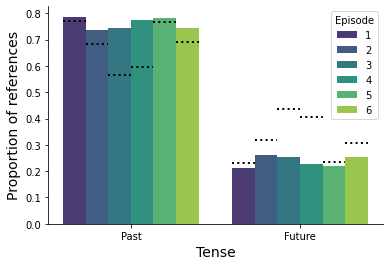

In [126]:
episodes = np.arange(1, 7, dtype=int)
tenses = [get_demo_tenses(demo_fname(n)) for n in episodes]

# add episode labels
for i, t in enumerate(tenses):
    t['episode'] = episodes[i]

# combine into one dataframe
tenses = pd.concat(tenses, ignore_index=True)

sns.barplot(tenses, x='tense', y='proportion', hue='episode', palette='viridis')
plt.xlabel('Tense', fontsize=14)
plt.ylabel('Proportion of references', fontsize=14)
plt.legend(title='Episode', loc='upper right')
sns.despine(top=True, right=True)

ax = plt.gca()

# add manual reference counts as dotted lines
for i, p in enumerate(ax.patches):
    x = [p.get_x(), p.get_x() + p.get_width()]  # X-coordinate of the center of the bar
    y = manual.iloc[i]['proportion']
    ax.plot(x, [y, y], linestyle='dotted', linewidth=2, color='black')

In [10]:
all_tenses = []
for f in tqdm(fnames):
  tenses = {}
  dialogue = get_dialogue(os.path.join(imsdb_dir, f))

  if dialogue is None:
    continue

  for d in dialogue['Character_dialogue'].values:
    d = d.strip()
    if len(d) > 0:
      tenses = add_dict(tenses, tag_document(d))
  
  all_tenses.append((f[:-4], tenses))

100%|██████████| 1127/1127 [5:02:25<00:00, 16.10s/it]   


In [11]:
def tenses2df(all_tenses):
    keys = set()
    for t in all_tenses:
        keys = keys.union(set(t[1].keys()))

    df = pd.DataFrame(columns=list(keys), index=pd.Index([t[0] for t in all_tenses], name='Film'))
    for m, t in all_tenses:
        for k in t:
            df.loc[m, k] = t[k]

    df = df.fillna(0)
    df['Total'] = df.sum(axis=1)

    for k in keys:
        df[k] = df[k] / df['Total']
    df.drop('Total', axis=1, inplace=True)
    return df.dropna(how='all', axis=0)

In [12]:
df = tenses2df(all_tenses)
df

,conditional indefinite,present indefinite,past indefinite,infinitive
Film,,,,
Midnight-Express,0.061722,0.542012,0.272303,0.123963
Big-Eyes,0.076048,0.555096,0.284532,0.084325
Warrior,0.069118,0.520588,0.272794,0.137500
Hellraiser-Hellseeker,0.088144,0.512725,0.278088,0.121043
Hannah-and-Her-Sisters,0.087430,0.511512,0.270068,0.130989
...,...,...,...,...
Smashed,0.125676,0.448649,0.283108,0.142568
Wild-Wild-West,0.093483,0.529380,0.240385,0.136752
Sessions-The,0.115983,0.505658,0.239745,0.138614


<Axes: xlabel='Proportion', ylabel='Tense'>

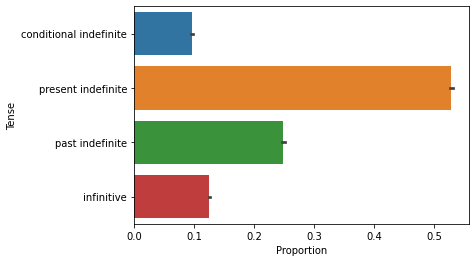

In [13]:
sns.barplot(data=df.reset_index().melt(id_vars='Film', var_name='Tense', value_name='Proportion'), y='Tense', x='Proportion', orient='h')